#Importing Apple stock data using pandas_datareader library
1. Go through the documnetation of pandas_datareader library
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
2. Sign in/sign up in Tiingo,
3. And get your own key in authenticaton section.

In [ ]:
import pandas_datareader as pdr
key = "71033ea893dd82e0f80d38aee621aae2d94ca2a6"
# key = "---------------------------------------"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.head()

<ipython-input-14-ea6459b1719b>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


close    high     low    open    volume  \
symbol date                                                                  
AAPL   2019-02-04 00:00:00+00:00  171.25  171.66  167.28  167.41  31495582   
       2019-02-05 00:00:00+00:00  174.18  175.08  172.35  172.86  36101628   
       2019-02-06 00:00:00+00:00  174.24  175.57  172.85  174.65  28239591   
       2019-02-07 00:00:00+00:00  170.94  173.94  170.34  172.40  31741690   
       2019-02-08 00:00:00+00:00  170.41  170.66  168.42  168.99  23819966   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2019-02-04 00:00:00+00:00  41.090613  41.188990  40.138031  40.169223   
       2019-02-05 00:00:00+00:00  41.793652  42.009603  41.354553  41.476925   
       2019-02-06 00:00:00+00:00  41.808049  42.127176  41.474525  41.906427   
       2019-02-07 00:00:00+00:00  41.016230  41.736066  40.872263  41.366550   
       2019-02-08 00:00:00+00:00  41.064219  41.124462  40.584683  40.722037   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2019-02-04 00:00:00+00:00  125982328     0.00          1.0  
       2019-02-05 00:00:00+00:00  144406512     0.00          1.0  
       2019-02-06 00:00:00+00:00  112958364     0.00          1.0  
       2019-02-07 00:00:00+00:00  126966760     0.00          1.0  
       2019-02-08 00:00:00+00:00   95279864     0.73          1.0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df.to_csv("apple.csv")

In [ ]:
data = pd.read_csv("apple.csv")
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2024-01-29 00:00:00+00:00,191.73,192.200,189.58,192.010,47145622,191.73,192.200,189.58,192.010,47145622,0.0,1.0
1255,AAPL,2024-01-30 00:00:00+00:00,188.04,191.800,187.47,190.940,55859370,188.04,191.800,187.47,190.940,55859370,0.0,1.0
1256,AAPL,2024-01-31 00:00:00+00:00,184.40,187.095,184.35,187.040,55467803,184.40,187.095,184.35,187.040,55467803,0.0,1.0
1257,AAPL,2024-02-01 00:00:00+00:00,186.86,186.950,183.82,183.985,64885408,186.86,186.950,183.82,183.985,64885408,0.0,1.0
1258,AAPL,2024-02-02 00:00:00+00:00,185.85,187.330,179.25,179.860,102551680,185.85,187.330,179.25,179.860,102551680,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [ ]:
#working on "close" column

dataset = data["close"][500:].reset_index(drop=True)
dataset_copy = dataset
print(dataset.shape)
dataset.head()

(759,)


0    137.09
1    131.96
2    134.14
3    134.99
4    133.94
Name: close, dtype: float64

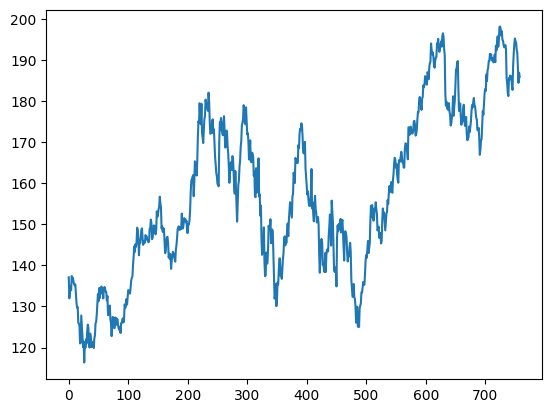

In [ ]:
plt.plot(dataset)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
dataset= scale.fit_transform(np.array(dataset).reshape(-1,1))
dataset.shape

(759, 1)

#Spliting the data for train and test


In [ ]:

train = dataset[:int(len(dataset)*0.7),:]
test = dataset[int(len(dataset)*0.7):,:]
train.shape, test.shape

((531, 1), (228, 1))

In [ ]:
def create_data(data, stepsize):
  fetures = []
  target = []
  for i in range(len(data)-stepsize):
    fetures.append(data[i:i+stepsize])
    target.append(data[i+stepsize,0])
  return np.array(fetures), np.array(target)

In [ ]:
step =80
train_x, train_y = create_data(train, step)
train_x.shape, train_y.shape

((451, 80, 1), (451,))

In [ ]:
test_x, test_y = create_data(test, step)
test_x.shape, test_y.shape

((148, 80, 1), (148,))

#Creating model

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(100 , return_sequences=True, input_shape = (80,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(optimizer="adam", loss ="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 80, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 80, 100)           80400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 201701 (787.89 KB)
Trainable params: 201701 (787.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_x, train_y, epochs = 100 , batch_size = 64, validation_data=(test_x, test_y), verbose =1)

Epoch 1/100
8/8 [==============================] - 6s 174ms/step - loss: 0.0618 - val_loss: 0.1192
Epoch 2/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0192 - val_loss: 0.0082
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0109 - val_loss: 0.0444
Epoch 4/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0105 - val_loss: 0.0256
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0094 - val_loss: 0.0291
Epoch 6/100
8/8 [==============================] - 0s 31ms/step - loss: 0.0079 - val_loss: 0.0154
Epoch 7/100
8/8 [==============================] - 0s 32ms/step - loss: 0.0075 - val_loss: 0.0084
Epoch 8/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0071 - val_loss: 0.0192
Epoch 9/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0065 - val_loss: 0.0077
Epoch 10/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0056 - val_loss: 0.0118
Epoch 11/100
8/8 [

In [ ]:
#Predicting for train as well as test data

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)
train_pred.shape, test_pred.shape

5/5 [==============================] - 0s 8ms/step


((451, 1), (148, 1))

In [ ]:
#Calculating RMSE

import math
from sklearn.metrics import mean_squared_error
print("RMSE for train_data : ", math.sqrt(mean_squared_error(train_y, train_pred)))
print("RMSE for test_data : ", math.sqrt(mean_squared_error(test_y,test_pred)))

RMSE for train_data :  0.03865316590898607
RMSE for test_data :  0.03811485944619281


In [ ]:
# Inversing the scaling
train_pred = scale.inverse_transform(train_pred)
test_pred = scale.inverse_transform(test_pred)

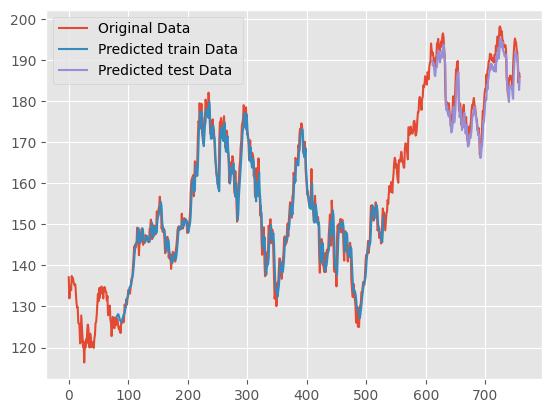

In [ ]:
#plotting

# for predicted train data
step = 80
plot_train_predict = np.empty_like(dataset_copy)
plot_train_predict[:,] = np.nan
plot_train_predict[step:len(train),] = train_pred.reshape(-1,)

# for predicted test data
plot_test_predict = np.empty_like(dataset_copy)
plot_test_predict[:,] = np.nan
plot_test_predict[len(train)+step:len(dataset_copy),] = test_pred.reshape(-1,)

plt.style.use("ggplot")
plt.plot(dataset_copy, label = "Original Data")
plt.plot(plot_train_predict, label = "Predicted train Data")
plt.plot(plot_test_predict, label = "Predicted test Data")
plt.legend()

#Predicting 30 further more points

In [ ]:
test_copy = test
test_another = test
test_data = test[-80:,].reshape(1,80,1)

step = 80
i = 0
answer = []
while i < 30:
  prediction = model.predict(test_data[-80:,].reshape(1,80,1), verbose = 0)
  test_data = np.append(test_data,prediction)
  test_copy = np.append(test_copy,prediction)
  answer.append(scale.inverse_transform(prediction).reshape(-1,).tolist())
  i = i+1
answer

[[184.18319702148438],
 [182.32569885253906],
 [180.5236358642578],
 [178.85079956054688],
 [177.26681518554688],
 [175.73574829101562],
 [174.2375946044922],
 [172.7625732421875],
 [171.306640625],
 [169.869140625],
 [168.4512481689453],
 [167.0551300048828],
 [165.683349609375],
 [164.33859252929688],
 [163.0234375],
 [161.74038696289062],
 [160.49176025390625],
 [159.27967834472656],
 [158.1061553955078],
 [156.97296142578125],
 [155.88177490234375],
 [154.833984375],
 [153.83082580566406],
 [152.873291015625],
 [151.96214294433594],
 [151.09788513183594],
 [150.2808074951172],
 [149.51092529296875],
 [148.78807067871094],
 [148.11180114746094]]

In [ ]:
test_copy = scale.inverse_transform(test_copy.reshape(-1, 1)).reshape(-1, )
test_data = scale.inverse_transform(test_data.reshape(-1, 1)).reshape(-1, )
test_another = scale.inverse_transform(test_another.reshape(-1, 1)).reshape(-1, )

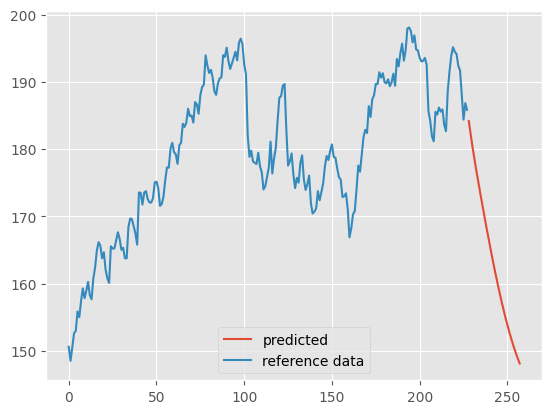

In [ ]:
final = np.empty_like(test_copy)
final[:,] = np.nan
final[-30: ,] = test_data[-30:]
plt.plot(final, label = "predicted")
plt.plot(test_another, label = "reference data")

plt.legend()